<a href="https://colab.research.google.com/github/RafaelNovais/CT5148-Ai/blob/master/Stress_Predict_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
0.6817117624396171


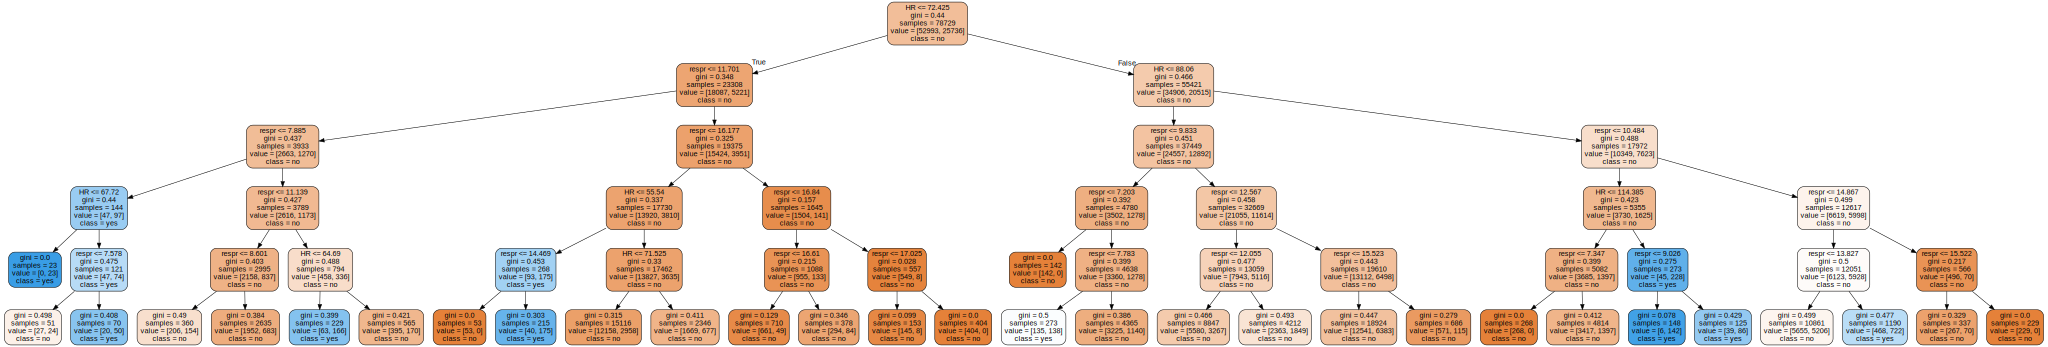

In [19]:
from pandas.core.arrays.datetimelike import mode
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
!pip install graphviz
!apt-get install graphviz


"""
Rafael Novais de Melo
2324-CT5170 Principles of Machine Learning
23113607

Understanding the Dataset
Supervised Classification becasue the data is binary ad we can do a predict and training with the data we have
The appropriate machine learning category for solving the problem of predicting stress levels is Linear Regression .
You can treating the stress level as a continuous numerical variable and predict a numerical value representing the stress level,
can provide a quantitative estimate of stress, allowing for a more fine-grained understanding of stress levels.

Data Exploration
Can not be considered imbalanced because the proportion is:
Data
0    0.672802
1    0.327198
Test
0    0.671782
1    0.328218
Train
0    0.673239
1    0.326761

Choosing an ML Package
Panda to read and use the files
Scikit Learn to use classification algorithms, decision trees, random forests, support vector machines, linear regression
Matplotlib and seaborn  to data visualization and scientific plotting
numpy to organize the data and math


Data Pre-processing
Remove the rowns are empty
set the data in a dataframe


Algorithm Selection and Application



"""
###Data Pre-processing
data = pd.read_csv("/content/Data.csv")
dataTest = pd.read_csv("/content/test.csv")
dataTrain = pd.read_csv("/content/train.csv")
data = pd.DataFrame(data)
data = data.dropna()
dataTest = pd.DataFrame(dataTest)
dataTest = dataTest.dropna()
dataTrain = pd.DataFrame(dataTrain)
dataTrain = dataTrain.dropna()

x_data = data[["HR","respr"]]
y_data = data["Label"]
x_test = dataTest[["HR","respr"]]
y_test = dataTest["Label"]
x_train = dataTrain[["HR","respr"]]
y_train = dataTrain["Label"]


###Data Exploration
propor_data = y_data.value_counts()/len(x_data)
propor_test = y_test.value_counts()/len(x_test)
propor_train = y_train.value_counts()/len(x_train)


###Algorithm Selection and Application
##DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test,predict)
print(accuracy)
dot_data = export_graphviz(model, feature_names=x_train.columns, class_names=["no", "yes"] ,filled=True, rounded=True)
graphviz.Source(dot_data)



In [ ]:
###Model Evaluation
model = LinearSVC()
model.fit(x_train,y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test,predict)
print(accuracy)

sns.relplot(x="HR",y="respr",col="Label", hue="Label",data=data)

In [ ]:
print(accuracy)

print(propor_data )
print(propor_test )
print(propor_train)

print(data)

0.32857354466005034
0    0.672802
1    0.327198
Name: Label, dtype: float64
0    0.671782
1    0.328218
Name: Label, dtype: float64
0    0.673239
1    0.326761
Name: Label, dtype: float64
<bound method DataFrame.notnull of         Participant      HR      respr   Time(sec)  Label
0                 2  118.00  12.127693  1644227583      0
1                 2  113.50  12.127693  1644227584      0
2                 2   93.00  12.127693  1644227585      0
3                 2   93.25  12.127693  1644227586      0
4                 2   86.40  12.127693  1644227587      0
...             ...     ...        ...         ...    ...
112511           35   65.45  11.546524  1646842243      0
112512           35   65.47  11.520924  1646842244      0
112513           35   65.50  11.495324  1646842245      0
112514           35   65.50  11.466879  1646842246      0
112515           35   65.50  11.441279  1646842247      0

[112516 rows x 5 columns]>
